In [152]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astropy.io import fits,ascii
import pandas as pd
import cmasher as cmr
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import pingouin

In [156]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv('/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv')
master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = prospect[prospect['MAGPIID'].isin(onere["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(onere["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(onere["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(onere["MAGPIID"])]
master = master[master['MAGPIID'].isin(onere["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(onere["MAGPIID"])]

106
106
106


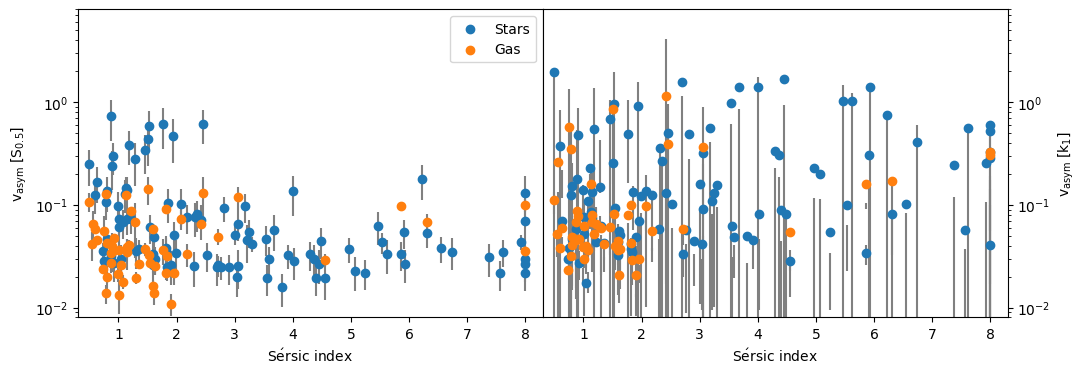

In [184]:
vs_s05 = sample["v_asym_s"].to_numpy()
vs_s05_err=sample["v_asym_s_err"].to_numpy()
vg_s05 = sample["v_asym_g"].to_numpy()
vg_s05_err=sample["v_asym_g_err"].to_numpy()
vs_onere = onere["v_asym_s"].to_numpy()
vs_onere_err = onere["v_asym_s_err"].to_numpy()
vg_onere = onere["v_asym_g"].to_numpy()
vg_onere_err = onere["v_asym_g_err"].to_numpy()
n = galfit["n"].to_numpy()
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(n,vs_s05,zorder=2,label="Stars")
ax[0].scatter(n,vg_s05,zorder=2,label="Gas")
ax[0].errorbar(n,vs_s05,yerr=vs_s05_err,ls="",color="grey",zorder=1)
ax[0].errorbar(n,vg_s05,yerr=vg_s05_err,ls="",color="grey",zorder=1)
ax[1].scatter(n,vs_onere,zorder=3,label="Stars")
ax[1].scatter(n,vg_onere,zorder=3,label="Gas")
ax[1].errorbar(n,vs_s05,yerr=vs_onere_err,ls="",color="grey",zorder=2)
ax[1].errorbar(n,vg_s05,yerr=vg_onere_err,ls="",color="grey",zorder=2)
for axes in ax.flat:
    axes.set_yscale("log")
    axes.set_yscale("log")
    axes.set_ylim(8e-3,8)
    axes.set_xlim(0.3,8.3)
    axes.set_xlabel(r"S$\'{\rm e}$rsic index")
ax[0].set_ylabel(r"v$_{\rm asym}$ [S$_{0.5}$]")
ax[1].set_ylabel(r"v$_{\rm asym}$ [k$_1$]")
ax[0].legend()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0)
plt.show()

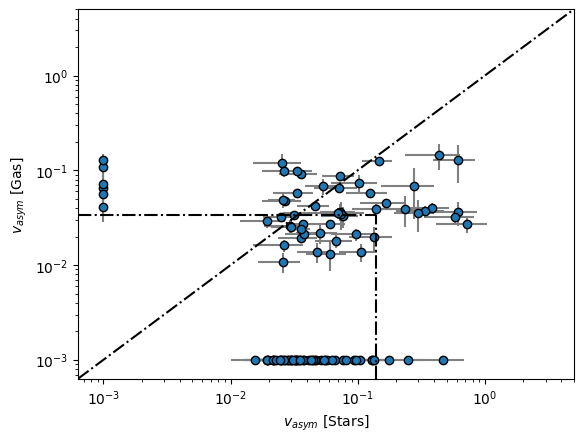

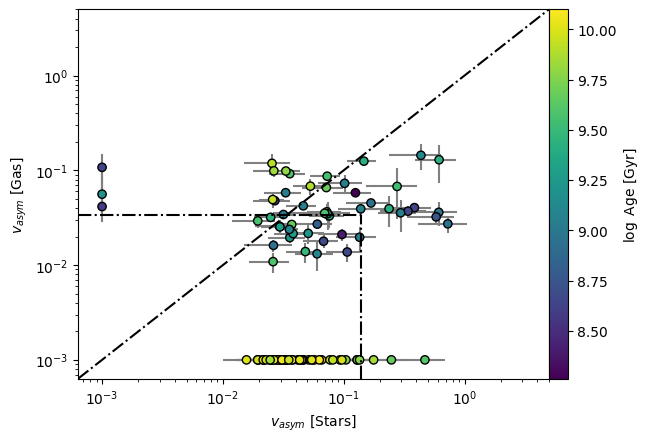

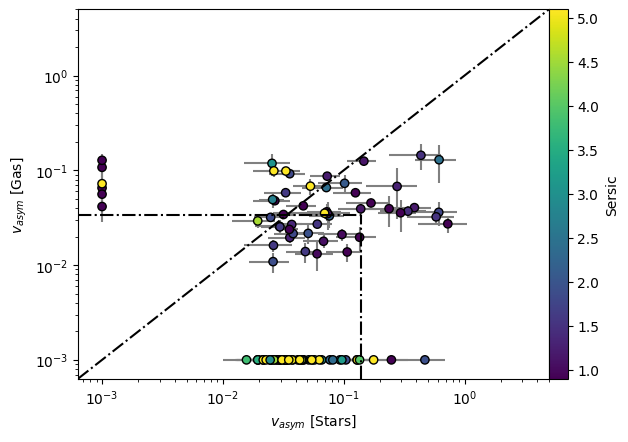

In [190]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
# onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv('/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv')
master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = prospect[prospect['MAGPIID'].isin(sample["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(sample["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]
master = master[master['MAGPIID'].isin(sample["MAGPIID"])]
#sample = sample[sample["MAGPIID"].isin(onere["MAGPIID"])]

vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
age = ssp["logage_LW_1re"].to_numpy()

vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,ec="k",zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(10**(-3.2),10**(0.7))
ax.set_ylim(10**(-3.2),10**(0.7))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),ls="dashdot",color="k")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),ls="dashdot",color="k")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars.pdf",bbox_inches="tight")

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,c=age,ec="k",zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
cbar = plt.colorbar(p,ax=ax,fraction=0.05,pad=0.00,label=r"$\log$ Age [Gyr]")
ax.set_xlim(10**(-3.2),10**(0.7))
ax.set_ylim(10**(-3.2),10**(0.7))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),ls="dashdot",color="k")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),ls="dashdot",color="k")
#cbar.ax.set_yticklabels([8.95,9.05,9.15,9.25,9.35,9.45,9.55,9.65,9.75])
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars_age.pdf",bbox_inches="tight")

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,c=galfit["n"],vmin=0.9,vmax=5.1,ec="k",zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.00,label="Sersic")
ax.set_xlim(10**(-3.2),10**(0.7))
ax.set_ylim(10**(-3.2),10**(0.7))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),ls="dashdot",color="k")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),ls="dashdot",color="k")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars_sersic.pdf",bbox_inches="tight")

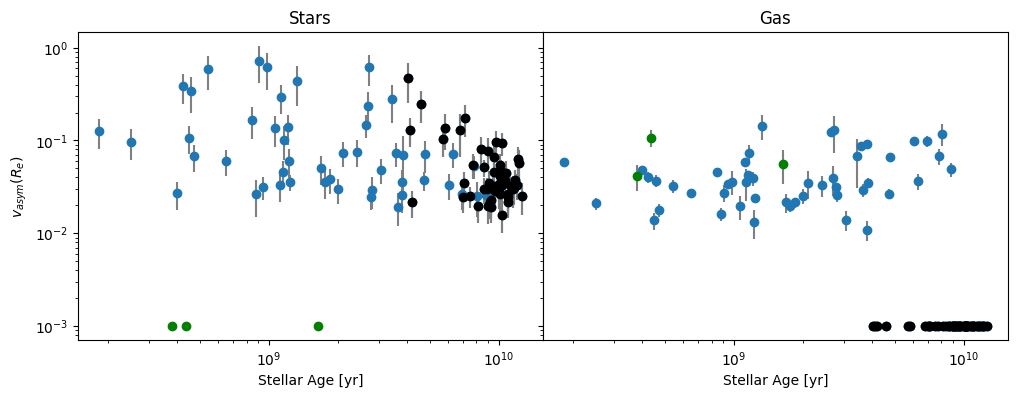

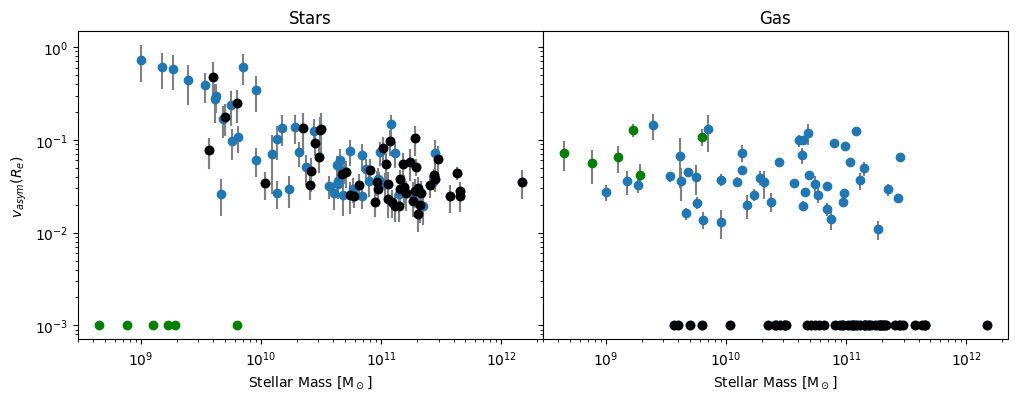

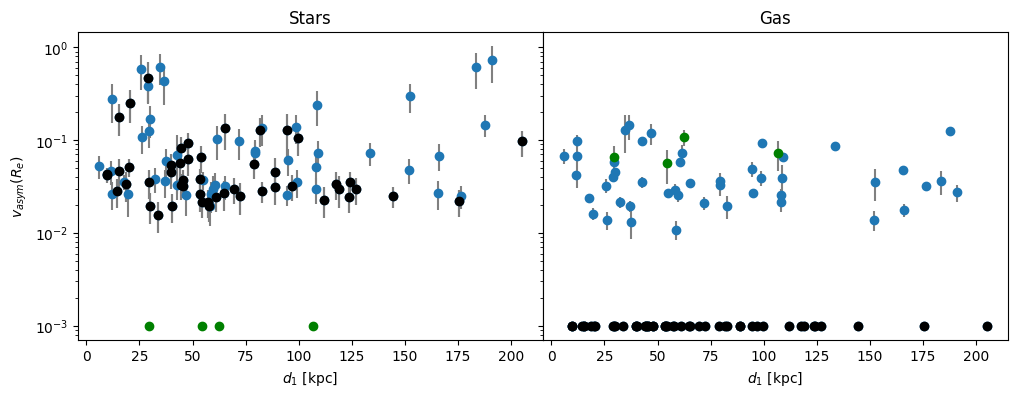

In [191]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey="row",figsize=(12,4))
ax1.scatter(10**(age[vs>2e-3]),vs[vs>2e-3],zorder=2)
ax1.errorbar(10**(age[vs>2e-3]),vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax1.scatter(10**(age[vs<2e-3]),vs[vs<2e-3],c="g",zorder=2)
ax1.errorbar(10**(age[vs<2e-3]),vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax1.scatter(10**(age[vg<2e-3]),vs[vg<2e-3],c="k",zorder=2)
ax1.errorbar(10**(age[vg<2e-3]),vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vs>2e-3]),vg[vs>2e-3],zorder=2)
ax2.errorbar(10**(age[vs>2e-3]),vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vs<2e-3]),vg[vs<2e-3],c="g",zorder=2)
ax2.errorbar(10**(age[vs<2e-3]),vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vg<2e-3]),vg[vg<2e-3],c="k",zorder=2)
ax2.errorbar(10**(age[vg<2e-3]),vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}(R_e)$")
ax1.set_xlabel(r"Stellar Age [yr]")
ax2.set_xlabel(r"Stellar Age [yr]")
plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_age.pdf",bbox_inches="tight")

mass = prospect["StellarMass_median"].to_numpy()
fig,(ax1,ax2) = plt.subplots(1,2,sharey="row",figsize=(12,4))
ax1.scatter(mass[vs>2e-3],vs[vs>2e-3],zorder=2)
ax1.errorbar(mass[vs>2e-3],vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax1.scatter(mass[vs<2e-3],vs[vs<2e-3],c="g",zorder=2)
ax1.errorbar(mass[vs<2e-3],vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax1.scatter(mass[vg<2e-3],vs[vg<2e-3],c="k",zorder=2)
ax1.errorbar(mass[vg<2e-3],vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(mass[vs>2e-3],vg[vs>2e-3],zorder=2)
ax2.errorbar(mass[vs>2e-3],vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax2.scatter(mass[vs<2e-3],vg[vs<2e-3],c="g",zorder=2)
ax2.errorbar(mass[vs<2e-3],vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(mass[vg<2e-3],vg[vg<2e-3],c="k",zorder=2)
ax2.errorbar(mass[vg<2e-3],vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.set_yscale("log")
ax2.set_xscale("log")
ax1.set_xscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}(R_e)$")
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_mass.pdf",bbox_inches="tight")

env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
env_sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
vs = env_sample["v_asym_s"].to_numpy()
vs_err=env_sample["v_asym_s_err"].to_numpy()
vg = env_sample["v_asym_g"].to_numpy()
vg_err=env_sample["v_asym_g_err"].to_numpy()
d1 = env["d1,kpc"].to_numpy()
fig,(ax1,ax2) = plt.subplots(1,2,sharey="row",figsize=(12,4))
ax1.scatter(d1[vs>2e-3],vs[vs>2e-3],zorder=2)
ax1.errorbar(d1[vs>2e-3],vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax1.scatter(d1[vs<2e-3],vs[vs<2e-3],c="g",zorder=2)
ax1.errorbar(d1[vs<2e-3],vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax1.scatter(d1[vg<2e-3],vs[vg<2e-3],c="k",zorder=2)
ax1.errorbar(d1[vg<2e-3],vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vs>2e-3],vg[vs>2e-3],zorder=2)
ax2.errorbar(d1[vs>2e-3],vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vs<2e-3],vg[vs<2e-3],c="g",zorder=2)
ax2.errorbar(d1[vs<2e-3],vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vg<2e-3],vg[vg<2e-3],c="k",zorder=2)
ax2.errorbar(d1[vg<2e-3],vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.set_yscale("log")
#ax2.set_xscale("log")
#ax1.set_xscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}(R_e)$")
ax1.set_xlabel(r"$d_1$ [kpc]")
ax2.set_xlabel(r"$d_1$ [kpc]")
plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_d1.pdf",bbox_inches="tight")

In [ ]:
env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")

master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/"
                     "MAGPI_master_source_catalogue.csv",skiprows=16)
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
#master = master[master["MAGPIID"].isin(sample["MAGPIID"])]
gal = np.zeros(len(env))
d1_ = np.zeros(len(env))
for i in range(len(env)):
    group = env[env['GroupName'].isin([env["GroupName"].to_numpy()[i]])]
    group_master = master[master["MAGPIID"].isin(group["MAGPIID"])]
    #print([env_sample['MAGPIID'].to_numpy()[i]])
    sample_master = master[master['MAGPIID'].isin([env['MAGPIID'].to_numpy()[i]])]
    x = group_master["xmax"].to_numpy()
    y = group_master["ymax"].to_numpy()
    #print(x,y)
    x0 = sample_master["xmax"].to_numpy()[0]
    y0 = sample_master["ymax"].to_numpy()[0]
    z = sample_master["z"].to_numpy()[0]
    gal[i] = sample_master["MAGPIID"].to_numpy()[0]
    #print(x0,y0)
    d1 = np.sqrt((x-x0)**2 + (y-y0)**2)
    d1 = np.min(d1[d1>0])
    cd = cosmo.comoving_distance(z).to(u.kpc).value
    d1 = np.radians(d1*(0.2/3600))
    d1 = d1*cd
    d1_[i] = d1
env["d1,kpc"] = d1_
env.to_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")

In [ ]:
dpa =pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
sample = sample[sample["MAGPIID"].isin(dpa["MAGPIID"])]
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
ssp = ssp[ssp["MAGPIID"].isin(dpa["MAGPIID"])]
vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
age = ssp["logage_LW_1re"].to_numpy()
vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey="row")
p=ax[0].scatter(10**(age[vs>2e-3]),vs[vs>2e-3],zorder=2,c=dpa['D_PA'].to_numpy()[vs>2e-3],vmin=0,vmax=180)
ax[0].errorbar(10**(age[vs>2e-3]),vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax[0].scatter(10**(age[vs<2e-3]),vs[vs<2e-3],c="g",zorder=2)
ax[0].errorbar(10**(age[vs<2e-3]),vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax[0].scatter(10**(age[vg<2e-3]),vs[vg<2e-3],c="k",zorder=2)
ax[0].errorbar(10**(age[vg<2e-3]),vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vs>2e-3]),vg[vs>2e-3],zorder=2,c=dpa['D_PA'].to_numpy()[vs>2e-3])
ax[1].errorbar(10**(age[vs>2e-3]),vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vs<2e-3]),vg[vs<2e-3],c="g",zorder=2)
ax[1].errorbar(10**(age[vs<2e-3]),vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vg<2e-3]),vg[vg<2e-3],c="k",zorder=2)
ax[1].errorbar(10**(age[vg<2e-3]),vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[0].set_title("Stars")
ax[1].set_title("Gas")
ax[0].set_ylabel(r"$v_{asym}(R_e)$")
ax[0].set_xlabel(r"Stellar Age [yr]")
ax[1].set_xlabel(r"Stellar Age [yr]")
plt.subplots_adjust(wspace=0)
plt.colorbar(p,ax=ax,location="top",aspect=50)
plt.show()

In [ ]:
dpa.info()

In [ ]:
from pafit.fit_kinematic_pa import fit_kinematic_pa

In [ ]:
file = fits.open("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Maps/MAGPI1202/Absorption_Line/1202197197_kinematics_ppxf-maps.fits")
velo = file[1].data
#velo = velo[0:80,0:80]
velo[np.isnan(velo)]=0
x=y=np.arange(0,40,1)
v=[]
for i in range(len(x)):
    v.append(velo[x[i],y[i]])
v = v-np.median(v)
v = np.array(v)
fit_kinematic_pa(x,y,v,steps=2)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(v,x)
ax.set_xlim(-400,400)
#ax.set_ylim(10,70)